<a href="https://colab.research.google.com/github/dqdung1604/AI_Sem2_2022-2023/blob/main/Fuzzy%20Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e4102840fab1ee827075847f353df0ad94d5b99c503c8865ea9e656390bb403d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


4.277069839264491


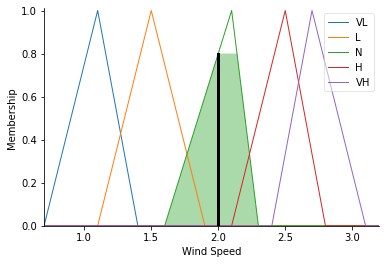

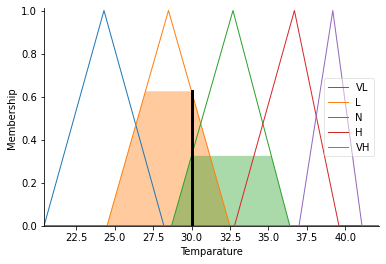

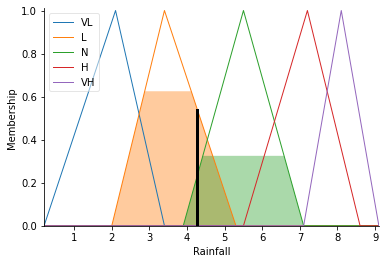

In [7]:
# Prediction of Rainfall using Fuzzy Logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.7, 3.2, 0.001), 'Wind Speed')
temparature = ctrl.Antecedent(np.arange(20.4, 42.2, 0.01), 'Temparature')
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'Rainfall')

wind_speed['VL'] = fuzz.trimf(wind_speed.universe, [0.7, 1.1, 1.4])
wind_speed['L'] = fuzz.trimf(wind_speed.universe, [1.1, 1.5, 1.9])
wind_speed['N'] = fuzz.trimf(wind_speed.universe, [1.6, 2.1, 2.3])
wind_speed['H'] = fuzz.trimf(wind_speed.universe, [2.1, 2.5, 2.8])
wind_speed['VH'] = fuzz.trimf(wind_speed.universe, [2.4, 2.7, 3.1])

temparature['VL'] = fuzz.trimf(temparature.universe, [20.4, 24.3, 28.2])
temparature['L'] = fuzz.trimf(temparature.universe, [24.5, 28.5, 32.5])
temparature['N'] = fuzz.trimf(temparature.universe, [28.7, 32.7, 36.4])
temparature['H'] = fuzz.trimf(temparature.universe, [32.8, 36.7, 39.6])
temparature['VH'] = fuzz.trimf(temparature.universe, [37.0, 39.2, 41.1])

rainfall['VL'] = fuzz.trimf(rainfall.universe, [0.2, 2.1, 3.4])
rainfall['L'] = fuzz.trimf(rainfall.universe, [2.0, 3.4, 5.3])
rainfall['N'] = fuzz.trimf(rainfall.universe, [3.9, 5.5, 7.1])
rainfall['H'] = fuzz.trimf(rainfall.universe, [5.5, 7.2, 8.6])
rainfall['VH'] = fuzz.trimf(rainfall.universe, [7.1, 8.1, 9.1])

rule1 = ctrl.Rule(wind_speed['VL'] & temparature['VL'], rainfall['VL'])
rule2 = ctrl.Rule(wind_speed['L'] & temparature['VL'], rainfall['L'])
rule3 = ctrl.Rule(wind_speed['N'] & temparature['VL'], rainfall['L'])
rule4 = ctrl.Rule(wind_speed['H'] & temparature['VL'], rainfall['N'])
rule5 = ctrl.Rule(wind_speed['VH'] & temparature['VL'], rainfall['H'])
rule6 = ctrl.Rule(wind_speed['VL'] & temparature['L'], rainfall['VL'])
rule7 = ctrl.Rule(wind_speed['L'] & temparature['L'], rainfall['L'])
rule8 = ctrl.Rule(wind_speed['N'] & temparature['L'], rainfall['L'])
rule9 = ctrl.Rule(wind_speed['H'] & temparature['L'], rainfall['N'])
rule10 = ctrl.Rule(wind_speed['VH'] & temparature['L'], rainfall['H'])
rule11 = ctrl.Rule(wind_speed['VL'] & temparature['N'], rainfall['L'])
rule12 = ctrl.Rule(wind_speed['L'] & temparature['N'], rainfall['L'])
rule13= ctrl.Rule(wind_speed['N'] & temparature['N'], rainfall['N'])
rule14 = ctrl.Rule(wind_speed['H'] & temparature['N'], rainfall['N'])
rule15 = ctrl.Rule(wind_speed['VH'] & temparature['N'], rainfall['H'])
rule16 = ctrl.Rule(wind_speed['VL'] & temparature['H'], rainfall['L'])
rule17 = ctrl.Rule(wind_speed['L'] & temparature['H'], rainfall['N'])
rule18 = ctrl.Rule(wind_speed['N'] & temparature['H'], rainfall['H'])
rule19 = ctrl.Rule(wind_speed['H'] & temparature['H'], rainfall['H'])
rule20 = ctrl.Rule(wind_speed['VH'] & temparature['H'], rainfall['H'])
rule21 = ctrl.Rule(wind_speed['VL'] & temparature['VH'], rainfall['N'])
rule22 = ctrl.Rule(wind_speed['L'] & temparature['VH'], rainfall['H'])
rule23 = ctrl.Rule(wind_speed['N'] & temparature['VH'], rainfall['H'])
rule24 = ctrl.Rule(wind_speed['H'] & temparature['VH'], rainfall['VH'])
rule25 = ctrl.Rule(wind_speed['VH'] & temparature['VH'], rainfall['VH'])

predicting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14,
                                      rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule23, rule24, rule25])
predicting = ctrl.ControlSystemSimulation(predicting_ctrl)
predicting.input['Wind Speed'] = 2.0
predicting.input['Temparature'] = 30
predicting.compute()
print(predicting.output['Rainfall'])

wind_speed.view(sim = predicting)
temparature.view(sim = predicting)
rainfall.view(sim = predicting)

In [ ]:
#